# Лабораторная работа № 4

In [212]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from typing import List, Callable
from matrix import Matrix

## 1
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка
в виде программ, задавая в качестве входных данных шаг сетки  .
С использованием разработанного программного обеспечения решить
задачу Коши для ОДУ 2-го порядка на указанном отрезке.
Оценить погрешность численного решения с использованием метода
Рунге – Ромберга и путем сравнения с точным решением.
Явный Эйлер, ЭйЛер-Коши, первый улучшенный Эйлер, рунге-кутты 4 пор

__Задача Коши__
$$y''+4xy'+(4x^2+2)y=0$$
$$y(0)=1$$
$$y'(0)=2$$
$$x \in [0,1], h =0.1$$
__Точное решение__
$$ y = (1+x)e^{-x^2}$$

__преобразуем__
$$y''= -4xy'-(4x^2+2)y$$
__заменим__ $y_1=y, y_2=y'$

$$y_1'=y_2$$
$$y_2'= -4xy_2-(4x^2+2)y_1$$
$$y_1(0) = 1 $$
$$y_2(0) = 2 $$

In [213]:
def f1(x, y):
    y1, y2 = y
    return np.array([y2, -4*x*y2 - (4*x**2 + 2)*y1])


h = 0.1

In [214]:
def precise(h: float = 0.1) -> np.array:
    @np.vectorize
    def y(x: float) -> float:
        return (1 + x) * math.exp(-x * x)
    return y(np.arange(0, 1 + h, h))


def euler_apparent(h: float = 0.1, y0=[1, 1], x0=0,
                   x1=1, f=f1) -> np.array:
    x = np.arange(x0, x1 + h, h)
    y = np.zeros((len(x), 2))
    y[0] = y0
    for k in range(len(x) - 1):
        y[k+1] = y[k] + h * f(x[k], y[k])
    return y[:, 0]


def euler_koshi(h: float = 0.1, y0=[1, 1], x0=0,
                x1=1, f=f1) -> np.array:
    x = np.arange(x0, x1 + h, h)
    y = np.zeros((len(x), 2))
    y[0] = y0
    for k in range(len(x)-1):
        k1 = f(x[k], y[k])
        y_mid = y[k] + (h/2)*k1
        k_mid = f(x[k] + h/2, y_mid)
        y[k+1] = y[k] + h * k_mid
    return y[:, 0]


def euler_better(h: float = 0.1, y0=[1, 1], x0=0,
                 x1=1,  f=f1) -> np.array:
    x = np.arange(x0, x1 + h, h)
    y = np.zeros((len(x), 2))
    y[0] = y0
    for k in range(len(x)-1):
        k1 = f(x[k], y[k])
        y_pred = y[k] + h * k1
        k2 = f(x[k] + h, y_pred)
        y[k+1] = y[k] + (h/2)*(k1 + k2)
    return y[:, 0]


def runge_kutte(h: float = 0.1, y0=[1, 1], x0=0,
                x1=1, f=f1) -> np.array:
    x = np.arange(x0, x1 + h, h)
    y = np.zeros((len(x), 2))
    y[0] = y0
    for k in range(len(x)-1):
        k1 = f(x[k], y[k])
        k2 = f(x[k] + h/2, y[k] + (h/2)*k1)
        k3 = f(x[k] + h/2, y[k] + (h/2)*k2)
        k4 = f(x[k] + h, y[k] + h*k3)
        y[k+1] = y[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y[:, 0]


def runge_romberg(method: Callable[[float], np.array],
                  h: float,
                  p: int,
                  y0=[1, 1],
                  x0=0,
                  x1=1,
                  f=f1):
    yh, yh2 = method(h, y0, x0, x1, f), method(h/2, y0, x0, x1, f)[::2]
    runge = (yh - yh2) / (math.pow(2, p) - 1)
    return np.abs(runge)


pd.set_option("display.precision", 3)
df = pd.DataFrame({"x": np.arange(0, 1 + h, h)})
df["prec"] = precise(h)
df["euler"] = euler_apparent(h)
df["euler_abs"] = np.abs(df["prec"] - df["euler"])
df["euler_rr"] = runge_romberg(euler_apparent, h, 2)

df["koshi"] = euler_koshi(h)
df["koshi_abs"] = np.abs(df["prec"] - df["koshi"])
df["koshi_rr"] = runge_romberg(euler_koshi, h, 2)

df["better"] = euler_better(h)
df["better_abs"] = np.abs(df["prec"] - df["better"])
df["better_rr"] = runge_romberg(euler_better, h, 2)

df["runge"] = runge_kutte(h)
df["runge_abs"] = np.abs(df["prec"] - df["runge"])
df["runge_rr"] = runge_romberg(runge_kutte, h, 4)

In [215]:
df

,x,prec,euler,euler_abs,euler_rr,koshi,koshi_abs,koshi_rr,better,better_abs,better_rr,runge,runge_abs,runge_rr
0,0.0,1.000,1.000,0.000,0.000,1.000,0.000e+00,0.000e+00,1.000,0.000e+00,0.000e+00,1.000,0.000e+00,0.000e+00
1,0.1,1.089,1.100,0.011,0.002,1.090,9.452e-04,2.413e-04,1.090,9.452e-04,2.394e-04,1.089,1.559e-06,9.769e-08
2,0.2,1.153,1.180,0.027,0.004,1.154,1.488e-03,3.841e-04,1.155,1.571e-03,3.994e-04,1.153,2.487e-06,1.560e-07
3,0.3,1.188,1.234,0.046,0.008,1.190,1.513e-03,3.981e-04,1.190,1.784e-03,4.555e-04,1.188,2.643e-06,1.658e-07
4,0.4,1.193,1.259,0.066,0.011,1.194,9.996e-04,2.760e-04,1.195,1.568e-03,4.027e-04,1.193,2.151e-06,1.350e-07
5,0.5,1.168,1.251,0.083,0.014,1.168,2.177e-05,3.505e-05,1.169,9.859e-04,2.559e-04,1.168,1.380e-06,8.636e-08
6,0.6,1.116,1.212,0.095,0.016,1.115,1.264e-03,2.867e-04,1.116,1.658e-04,4.682e-05,1.116,8.434e-07,5.222e-08
7,0.7,1.041,1.143,0.101,0.018,1.039,2.654e-03,6.383e-04,1.041,7.269e-04,1.828e-04,1.041,1.052e-06,6.470e-08
8,0.8,0.949,1.048,0.099,0.018,0.945,3.932e-03,9.652e-04,0.948,1.523e-03,3.900e-04,0.949,2.365e-06,1.465e-07
9,0.9,0.845,0.935,0.090,0.016,0.840,4.914e-03,1.220e-03,0.843,2.083e-03,5.385e-04,0.845,4.881e-06,3.041e-07


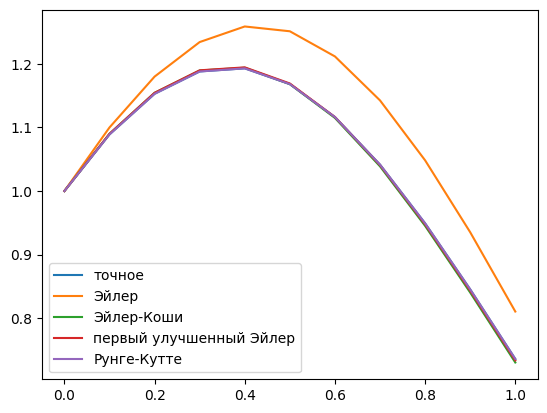

In [216]:
plt.subplot()
plt.plot(df["x"], df["prec"], label="точное")
plt.plot(df["x"], df["euler"], label="Эйлер")
plt.plot(df["x"], df["koshi"], label="Эйлер-Коши")
plt.plot(df["x"], df["better"], label="первый улучшенный Эйлер")
plt.plot(df["x"], df["runge"], label="Рунге-Кутте")
plt.legend()

## 2
Реализовать метод стрельбы и конечно-разностный метод решения
краевой задачи для ОДУ в виде программ. С использованием
разработанного программного обеспечения решить краевую задачу
для обыкновенного дифференциального уравнения 2-го порядка на
указанном отрезке. Оценить погрешность численного решения с
использованием метода Рунге – Ромберга и путем сравнения с
точным решением.

__Краевая задача__
$$ y''-2(1+tg(x)^2)y=0$$
$$ y(0) = 0$$
$$ y(\frac{\pi}{6})=-\frac{\sqrt{3}}{3}$$
__Точное решение__
$$ y(x) = -tg(x) $$

__преобразуем__
$$ y'' = 2(1 + tg^2(x))y$$
__заменим__ $y_1 = y, y_2 = y'$
$$ y_1' = y_2 $$
$$ y_2' = 2(1 + tg^2(x))y_1 $$

так как конец - $\frac{\pi}{6}$, добавим методы для решения не
через шаг, а через linspace

In [217]:
def runge_kutte_lp(n: int = 10, y0=[1, 1], x0=0,
                   x1=1, f=f1) -> np.array:
    x = np.linspace(x0, x1, n)
    y = np.zeros((len(x), 2))
    y[0] = y0
    for k in range(len(x)-1):
        h = x[k+1]-x[k]
        k1 = f(x[k], y[k])
        k2 = f(x[k] + h/2, y[k] + (h/2)*k1)
        k3 = f(x[k] + h/2, y[k] + (h/2)*k2)
        k4 = f(x[k] + h, y[k] + h*k3)
        y[k+1] = y[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y[:, 0]


def runge_romberg_lp(method: Callable[[float], np.array],
                     n: int,
                     p: int
                     ):
    yh, yh2 = method(n), method(n * 2)[::2]
    runge = (yh - yh2) / (math.pow(2, p) - 1)
    return np.abs(runge)

#### Метод стрельбы

In [218]:
N = 40
h = 0.1
targ = - np.sqrt(3) / 3
end = math.pi / 6


def f2(x, y):
    y1, y2 = y
    return np.array([y2, 2 * y1 * (1 + np.pow(np.tan(x), 2))])


@np.vectorize
def f_precise(x):
    return -np.tan(x)


def shoot(cnt=10, e: float = 0.0001):
    n = [1, 0.8]
    solutions = [
        runge_kutte_lp(n=cnt, y0=[0, 1], x0=0, x1=end, f=f2),
        runge_kutte_lp(n=cnt, y0=[0, 0.8], x0=0, x1=end, f=f2),
    ]
    phi = [
        solutions[-2][-2] - targ,
        solutions[-1][-1] - targ]
    for _ in range(100):
        n.append(
            n[-1] - (n[-1] - n[-2]) / (phi[-1] - phi[-2]) * phi[-1])
        solutions.append(
            runge_kutte_lp(n=cnt, y0=[0, n[-1]], x0=0, x1=end, f=f2))
        phi.append(solutions[-1][-1] - targ)
        if abs(phi[-1]) <= e:
            break
    return solutions[-1]


def ends(cnt=10, e: float = 0.0001):
    pass


df = pd.DataFrame({"x": np.linspace(0, end, N)})
df["y"] = f_precise(df["x"])
df["shoot"] = shoot(cnt=N)
df["shoot_abs"] = np.abs(df["y"] - df["shoot"])
df["shoot_rr"] = runge_romberg_lp(shoot, N, 4)
df

,x,y,shoot,shoot_abs,shoot_rr
0,0.000,-0.000,0.000,0.000e+00,0.000e+00
1,0.013,-0.013,-0.013,1.436e-11,1.133e-05
2,0.027,-0.027,-0.027,2.869e-11,2.268e-05
3,0.040,-0.040,-0.040,4.296e-11,3.404e-05
4,0.054,-0.054,-0.054,5.713e-11,4.545e-05
5,0.067,-0.067,-0.067,7.116e-11,5.690e-05
6,0.081,-0.081,-0.081,8.502e-11,6.842e-05
7,0.094,-0.094,-0.094,9.865e-11,8.000e-05
8,0.107,-0.108,-0.108,1.120e-10,9.168e-05
9,0.121,-0.121,-0.121,1.251e-10,1.035e-04


#### Метод конечно-разностный

In [219]:
def solve_rerun(left: Matrix, d: List[float] | List[int]) -> List[float]:
    assert left.rows == left.cols
    for i in range(left.rows):
        for j in range(left.cols):
            # three diagonals
            assert abs(j - i) <= 1 or left[i][j] == 0, \
                "must be a 3 diagonal matrix"

    a = [0 if i == 0 else left[i][i - 1] for i in range(left.rows)]
    b = [left[i][i] for i in range(left.rows)]
    c = [0 if i == left.rows - 1
         else left[i][i + 1] for i in range(left.rows)]
    p = [0.0 for _ in left]
    q = [0.0 for _ in left]
    for i in range(left.rows):
        for j in range(-1, 1):
            p[i] = -c[i] / (b[i] + a[i] * p[i - 1])
            q[i] = (d[i] - a[i]*q[i - 1]) / (b[i] + a[i] * p[i - 1])
    x = [0.0 for _ in left]
    x[-1] = q[-1]
    for i in range(left.rows - 1)[::-1]:
        x[i] = x[i + 1] * p[i] + q[i]
    return x

$$ y''-2(1+tg(x)^2)y=0$$
$$ y'' = \frac{y_{k+1} - 2y_k + y_{k-1}}{h^2} $$
$$ \frac{y_{k+1} - 2y_k + y_{k-1}}{h^2} = 2(1 + tg^2(x))y_k $$
$$ y_{k+1} - 2y_k + y_{k-1} = 2(1 + tg^2(x))y_k*h^2 $$
$$ y_{k+1} - 2y_k(1 + (1 + tg^2(x))*h^2) + y_{k-1} = 0 $$
__трех диагональная__
$$ - 2y_1(1 + (1 + tg^2(x))*h^2) + y_2 = -y_a $$
$$ y_{k+1} - 2y_k(1 + (1 + tg^2(x))*h^2) + y_{k-1} = 0 $$
$$ y_{n-1} - 2y_n(1 + (1 + tg^2(x))*h^2) = -y_b $$

In [221]:
x = np.linspace(0, end, N)
h = x[1] - x[0]
mat = Matrix.identity(N)
for i in range(0, N):
    if i > 0:
        mat[i][i-1] = 1
    mat[i][i] = -2*(1 + (1 + math.tan(x[i]) ** 2) * h * h)
    if i < N-1:
        mat[i][i+1] = 1
d = [0] + [0 for _ in range(N - 2)] + [-targ]

df["end"] = solve_rerun(mat, d)
df["end_abs"] = np.abs(df["y"] - df["end"])
df["end_rr"] = runge_romberg_lp(shoot, N, 2)
df

,x,y,shoot,shoot_abs,shoot_rr,end,end_abs,end_rr
0,0.000,-0.000,0.000,0.000e+00,0.000e+00,-0.013,1.264e-02,0.000e+00
1,0.013,-0.013,-0.013,1.436e-11,1.133e-05,-0.025,1.186e-02,5.666e-05
2,0.027,-0.027,-0.027,2.869e-11,2.268e-05,-0.038,1.108e-02,1.134e-04
3,0.040,-0.040,-0.040,4.296e-11,3.404e-05,-0.051,1.031e-02,1.702e-04
4,0.054,-0.054,-0.054,5.713e-11,4.545e-05,-0.063,9.543e-03,2.272e-04
5,0.067,-0.067,-0.067,7.116e-11,5.690e-05,-0.076,8.778e-03,2.845e-04
6,0.081,-0.081,-0.081,8.502e-11,6.842e-05,-0.089,8.016e-03,3.421e-04
7,0.094,-0.094,-0.094,9.865e-11,8.000e-05,-0.102,7.257e-03,4.000e-04
8,0.107,-0.108,-0.108,1.120e-10,9.168e-05,-0.114,6.501e-03,4.584e-04
9,0.121,-0.121,-0.121,1.251e-10,1.035e-04,-0.127,5.747e-03,5.173e-04
